In [9]:
import os
import pandas as pd
import re

In [6]:
VF = pd.read_csv("02072023_EcoliARETE_VFDB_filtered80_crosstab_gene_name.csv")
VFinfo = pd.read_csv("02132023_EcoliARETE_VFDB_filtered80_info.csv")

In [7]:
VFinfo

,Isolate_Pathname,qseqid,sseqid,Description,pident,slen,qlen,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,sequence
0,EC_0012_1H1_D,FMDFOANB_00208,VFG044172(gb|WP_000622316),(chuV) ATP-binding hydrophilic protein ChuV [C...,99.6,256,771,256,1,0,1,768,1,256,1.040000e-191,521.0,ATGATCAGCGCCCAGAATCTGGTTTATAGCCTTCAGGGGCGGCGTC...
1,EC_0012_1H1_D,FMDFOANB_00208,VFG013070(gb|WP_001626196),(shuV) ATP-binding component of hemin transpor...,99.6,256,771,256,1,0,1,768,1,256,2.980000e-191,520.0,ATGATCAGCGCCCAGAATCTGGTTTATAGCCTTCAGGGGCGGCGTC...
2,EC_0012_1H1_D,FMDFOANB_00209,VFG000922(gb|WP_000910402),(chuU) heme permease protein ChuU [Chu (VF0227...,100.0,330,957,318,0,0,1,954,13,330,1.760000e-217,592.0,ATGGGGCTATCACTATTATTGCTAGCTCTGGTGCTGTTCGGTGCCA...
3,EC_0012_1H1_D,FMDFOANB_00209,VFG012627(gb|WP_000910392),(chuU) heme permease protein ChuU [Chu (VF0234...,99.7,330,957,318,1,0,1,954,13,330,1.020000e-216,590.0,ATGGGGCTATCACTATTATTGCTAGCTCTGGTGCTGTTCGGTGCCA...
4,EC_0012_1H1_D,FMDFOANB_00209,VFG013069(gb|WP_005019013),(shuU) permease of iron compound ABC transport...,99.7,318,957,318,1,0,1,954,1,318,1.320000e-216,590.0,ATGGGGCTATCACTATTATTGCTAGCTCTGGTGCTGTTCGGTGCCA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42381,EC_E9L_1_E,FPAHFAHJ_04746,VFG000933(gb|WP_001007140),(entB) isochorismatase [Enterobactin (VF0228) ...,98.9,285,858,285,3,0,1,855,1,285,1.140000e-214,582.0,ATGGCTATTCCAAAATTACAGGCTTACGCACTGCCGGAGTCTCACG...
42382,EC_E9L_1_E,FPAHFAHJ_04746,VFG048419(gb|WP_004210873),"(entB) 2,3-dihydro-2,3-dihydroxybenzoate synth...",86.7,283,858,285,36,1,1,855,1,283,2.040000e-187,513.0,ATGGCTATTCCAAAATTACAGGCTTACGCACTGCCGGAGTCTCACG...
42383,EC_E9L_1_E,FPAHFAHJ_04747,VFG000934(gb|WP_000348393),"(entA) 2,3-dihydro-2,3-dihydroxybenzoate dehyd...",98.4,248,747,248,4,0,1,744,1,248,1.830000e-172,472.0,ATGGATTTCAGCGGTAAAAATGTCTGGGTAACTGGCGCAGGGAAAG...
42384,EC_E9L_1_E,FPAHFAHJ_04747,VFG048409(gb|WP_086074289),"(entA) 2,3-dihydroxybenzoate-2,3-dehydrogenase...",90.3,248,747,248,24,0,1,744,1,248,1.850000e-156,432.0,ATGGATTTCAGCGGTAAAAATGTCTGGGTAACTGGCGCAGGGAAAG...


In [10]:

pattern = r'\[(.*?)\]'
VFinfo['VF_category'] = VFinfo['Description'].apply(lambda x: re.search(pattern, x).group(1) if re.search(pattern, x) else '')

In [12]:
VFinfo.to_csv('03292023_ARETEEcoli_VF_results_filtered80_info_category.csv')

In [19]:
VFcatuniq = VFinfo.VF_category.unique()
VFcatuniq1 = pd.DataFrame(VFcatuniq, columns=['Categories'])


In [20]:
VFcatuniq1.to_csv('03292023_ARETEEcoli_VF_gene_categories_unique.csv')

In [26]:
pattern = r'(?<=\) -)\s*(.*)'
VFinfo['VF_category_only'] = VFinfo['VF_category'].apply(lambda x: re.search(pattern, x).group(1) if re.search(pattern, x) else '')

In [27]:
VFC = VFinfo['VF_category_only'].value_counts()

In [28]:
VFC

Nutritional/Metabolic factor (VFC0272)                    15226
Effector delivery system (VFC0086)                         9524
Adherence (VFC0001)                                        8473
Motility (VFC0204)                                         3492
Invasion (VFC0083)                                         1686
Immune modulation (VFC0258)                                1507
Regulation (VFC0301)                                       1314
Antimicrobial activity/Competitive advantage (VFC0325)      536
Exotoxin (VFC0235)                                          526
Exoenzyme (VFC0251)                                          86
                                                             14
Biofilm (VFC0271)                                             2
Name: VF_category_only, dtype: int64

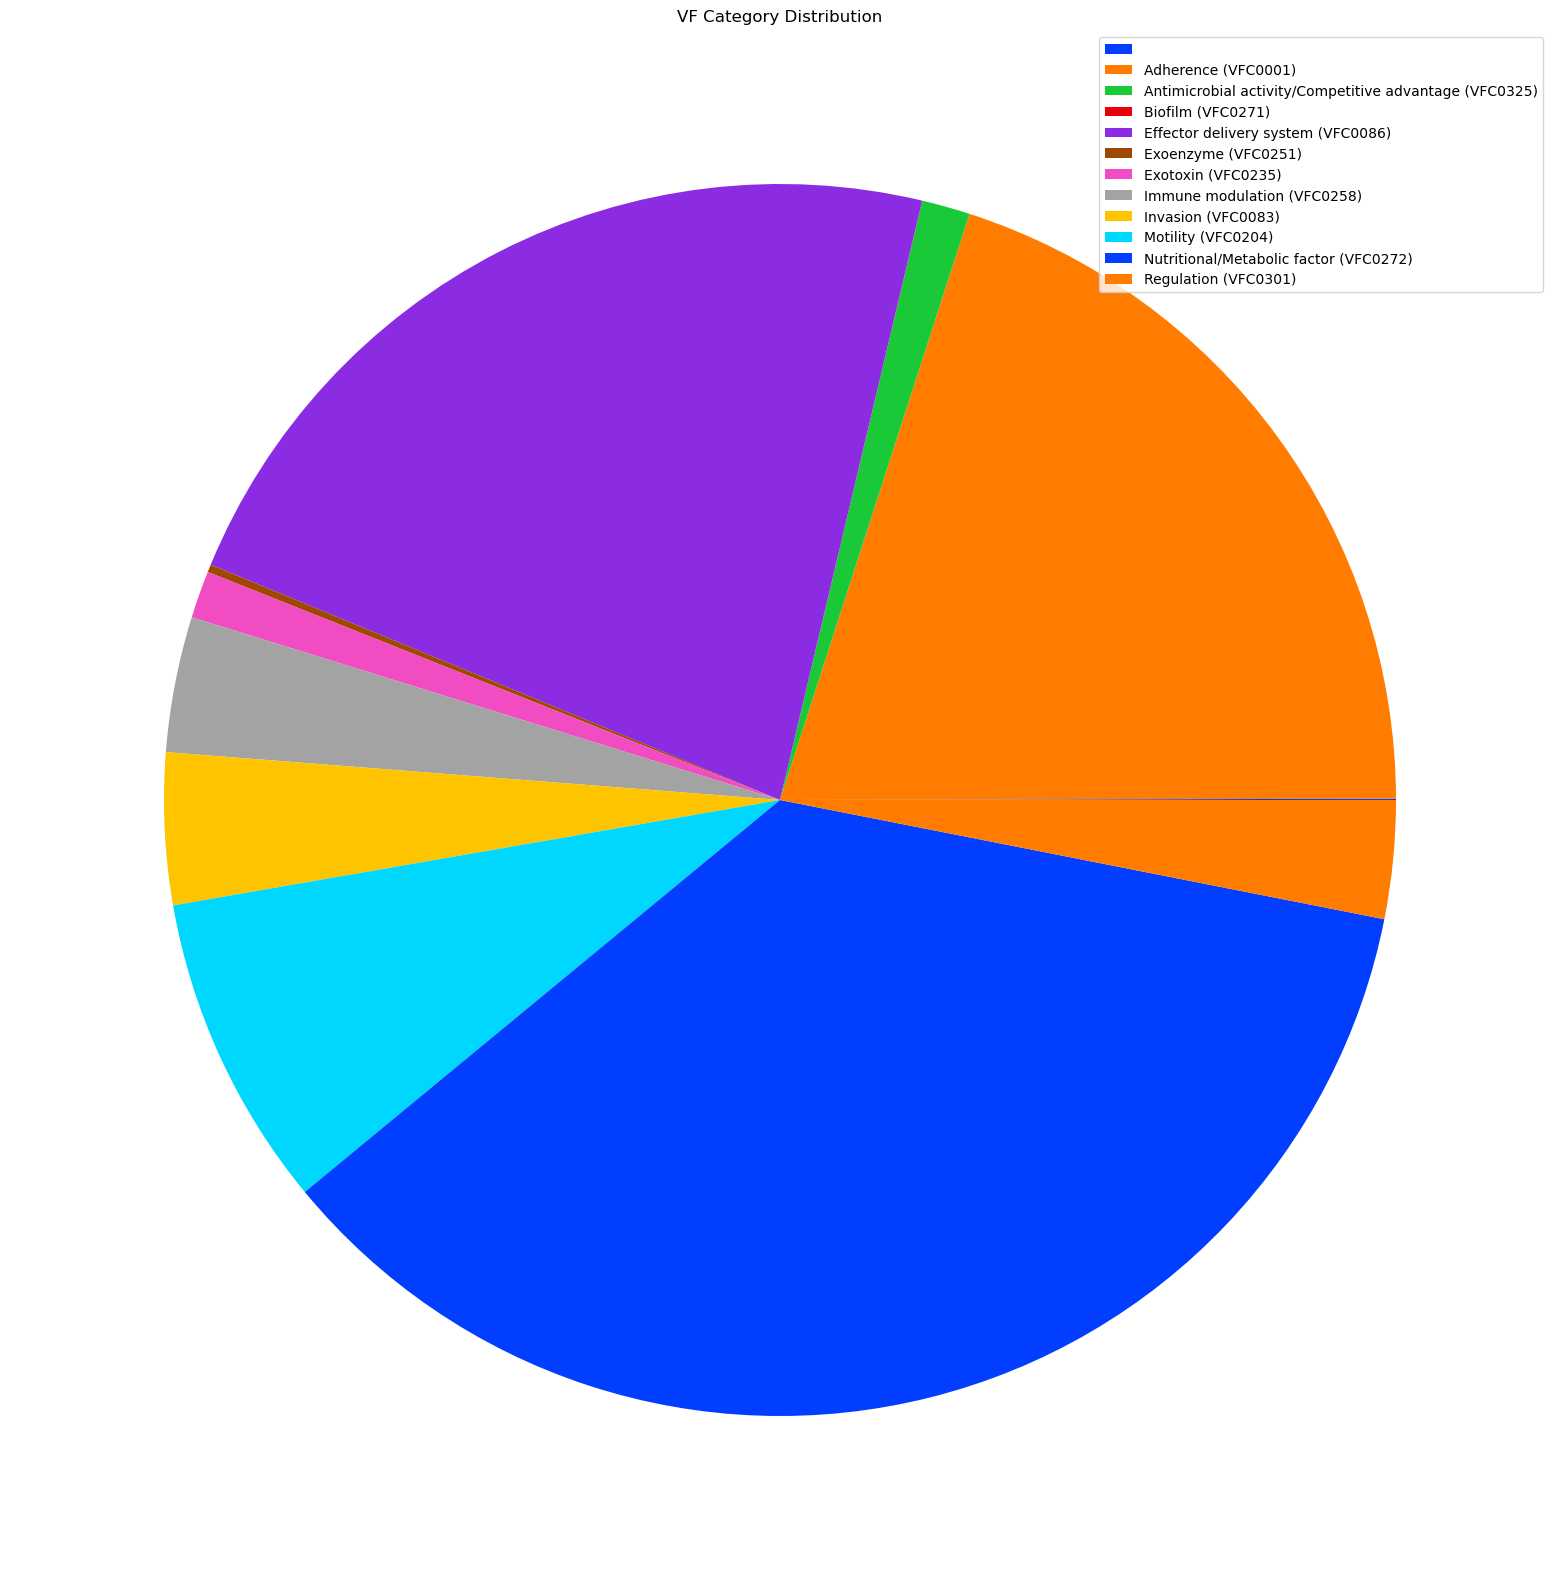

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# group data by Resistance Mechanism and Best_Hit_ARO
SA1 = VFinfo.groupby(['sseqid', 'VF_category_only']).size()

# sum data by Resistance Mechanism
SA14rm = SA1.groupby(['VF_category_only']).sum()

# create a pie chart with a color legend and labels
plt.figure(figsize=(20,20))
plt.pie(SA14rm.values, labels=None, colors=sns.color_palette('bright'))
plt.legend(SA14rm.index, loc='best')

# add a title to the plot
plt.title('VF Category Distribution')

# display the plot
plt.show()